In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

pd.options.display.max_rows = 100
plt.style.use('ggplot')

In [2]:
def getDataOld(filename):
    data = pd.read_csv(filename, names=['method', 'file', 'status', 'inf_input', 'quant_input', 'cuts_in', 'inf_output', 
                                        'quant_output', 'termset', 'mingrammar', 'num_mingrammars', 'can_sol', 'min_sol', 
                                        'time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_prcons', 
                                        'time_cleanproof'])
    data = data.replace(" ", -1)
    data = data.replace(-1, np.nan)
    data = data.replace('-1', np.nan)
    
    # Setting the correct datatypes
    columns = set(data.keys())
    integer_columns = [c for c in columns if c not in ['method', 'file', 'status']]
    for c in integer_columns:
        data[c] = data[c].astype(np.float)
        
    method_map = {
        'one_cut_one_quant': '1_dtable',
        'one_cut_many_quants': 'many_dtable',
        'many_cuts_one_quant_1': '1_maxsat',
        'many_cuts_one_quant_2': '1_1_maxsat',
    }
    data['method'] = data['method'].astype(str).map(method_map)
    data['file'] = data['file'].astype(str)
    data['status'] = data['status'].astype(str)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

def getData(filename):
    data = pd.read_json(filename)
    
    # Adding a column for the database
    def getDB (s):
        if s.endswith(')'):
            return 0
        elif 'testing/TSTP/prover9' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        elif 'testing/TSTP/leanCoP' in s:
            return 3
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

In [3]:
filename = "results.json"
data = getData(filename)

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
data_other_exp[['method', 'file', 'status']]

,method,file,status
122,1_dtable,testing/TSTP/prover9/LCL/LCL080-1/Prover9---11...,cutintro_other_exception
129,many_dtable,testing/TSTP/prover9/LCL/LCL416-1/Prover9---11...,cutintro_other_exception
131,2_maxsat,SquareDiagonalExampleProof(80),cutintro_other_exception
171,2_maxsat,SquareDiagonalExampleProof(63),cutintro_other_exception
187,1_dtable,testing/TSTP/leanCoP/SWW/SWW474+5/leanCoP---2....,cutintro_other_exception
255,many_dtable,FactorialFunctionEqualityExampleProof2(70),cutintro_other_exception
282,1_maxsat,testing/TSTP/prover9/LCL/LCL123-1/Prover9---11...,cutintro_other_exception
321,2_maxsat,SquareDiagonalExampleProof(84),cutintro_other_exception
351,1_dtable,testing/TSTP/prover9/LCL/LCL030-1/Prover9---11...,cutintro_other_exception
370,2_maxsat,SquareDiagonalExampleProof(79),cutintro_other_exception


In [5]:
# Test that fail for 1_dtable and are ok in 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat == 'ok') & (merged.status_dtable != 'ok')][['file', 'status_dtable']]

,file,status_dtable
19,LinearEqExampleProof(19),cutintro_timeout
55,LinearExampleProof(19),cutintro_timeout
135,SumOfOnesF2ExampleProof(11),cutintro_timeout
260,SumOfOnesF2ExampleProof(10),cutintro_timeout
263,testing/TSTP/prover9/GRP/GRP163-1/Prover9---11...,cutintro_timeout
280,SquareEdgesExampleProof(28),cutintro_timeout
357,FactorialFunctionEqualityExampleProof2(28),cutintro_timeout
432,FactorialFunctionEqualityExampleProof2(22),cutintro_timeout
491,testing/TSTP/prover9/LCL/LCL206-3/Prover9---11...,cutintro_timeout
649,SquareEdges2DimExampleProof(19),cutintro_timeout


In [6]:
# Test that are ok in 1_dtable and fail for 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat != 'ok') & (merged.status_dtable == 'ok')][['file', 'status_maxsat']]

,file,status_maxsat
38,testing/TSTP/prover9/GEO/GEO203+2/Prover9---11...,cutintro_uncompressible
101,testing/TSTP/prover9/MGT/MGT007-1/Prover9---11...,cutintro_uncompressible
163,testing/TSTP/prover9/PUZ/PUZ021-1/Prover9---11...,cutintro_ehs_unprovable
192,testing/TSTP/prover9/SWB/SWB014+2/Prover9---11...,cutintro_uncompressible
289,testing/TSTP/prover9/COL/COL044-7/Prover9---11...,cutintro_uncompressible
383,SumOfOnesExampleProof(4),cutintro_other_exception
406,testing/TSTP/prover9/SET/SET247-6/Prover9---11...,cutintro_timeout
415,testing/TSTP/prover9/REL/REL009-2/Prover9---11...,cutintro_uncompressible
446,testing/TSTP/prover9/SWB/SWB014+3/Prover9---11...,cutintro_uncompressible
464,testing/TSTP/prover9/MGT/MGT007+1/Prover9---11...,cutintro_uncompressible


In [7]:
# Regressions compared to previous test

previous_filename = "../2015-03-15/CutIntroDataLog.txt"
previous_data = getDataOld(previous_filename)

merged = pd.merge(data, previous_data, on=['method', 'file'], suffixes=('_new','_old'))

regression = merged[(merged.status_old == 'ok') & (merged.status_new != 'ok')]

regression_delta = regression[(regression.method == '1_dtable') | (regression.method == 'many_dtable')]
regression_maxsat = regression[((regression.method == '1_maxsat') | (regression.method == '1_1_maxsat')) ]

regression[['method', 'file', 'status_old', 'status_new']]

,method,file,status_old,status_new
2,1_maxsat,testing/TSTP/prover9/GRP/GRP030-1/Prover9---11...,ok,cutintro_uncompressible
28,1_maxsat,testing/TSTP/prover9/BOO/BOO021-1/Prover9---11...,ok,cutintro_uncompressible
182,1_1_maxsat,testing/TSTP/prover9/SET/SET788+1/Prover9---11...,ok,cutintro_timeout
193,1_maxsat,testing/TSTP/prover9/GEO/GEO223+3/Prover9---11...,ok,cutintro_uncompressible
197,1_1_maxsat,testing/TSTP/prover9/GEO/GEO179+2/Prover9---11...,ok,cutintro_uncompressible
210,1_maxsat,testing/TSTP/prover9/SYN/SYN052-1/Prover9---11...,ok,cutintro_uncompressible
314,1_dtable,testing/TSTP/prover9/PRO/PRO009+1/Prover9---11...,ok,cutintro_uncompressible
333,1_dtable,testing/TSTP/prover9/SYN/SYN072+1/Prover9---11...,ok,cutintro_uncompressible
339,1_maxsat,testing/TSTP/prover9/SEU/SEU430+1/Prover9---11...,ok,cutintro_uncompressible
348,1_maxsat,testing/TSTP/prover9/KLE/KLE148+1/Prover9---11...,ok,cutintro_uncompressible


In [8]:
methods = sorted(set(data.method.dropna()))

dbs = {
    0: 'Proof examples',
    1: 'Prover9',
    2: 'VeriT',
    3: 'LeanCoP',
}

dbs = { i: dbs[i] for i in dbs.keys() if i in data.db.values }

In [9]:
print("=== Number of tests per database and method:\n")

for dbi, dbname in dbs.items():
    for method in methods:
        print("{0} - {1}: {2}".format(dbname, method,
                                     data[(data.method==method) & (data.db==dbi)].shape[0]))
    print()

=== Number of tests per database and method:

Proof examples - 1_1_maxsat: 1193
Proof examples - 1_dtable: 1194
Proof examples - 1_maxsat: 1193
Proof examples - 2_2_maxsat: 1197
Proof examples - 2_maxsat: 1195
Proof examples - many_dtable: 1195

Prover9 - 1_1_maxsat: 6337
Prover9 - 1_dtable: 6338
Prover9 - 1_maxsat: 6339
Prover9 - 2_2_maxsat: 6340
Prover9 - 2_maxsat: 6338
Prover9 - many_dtable: 6337

VeriT - 1_1_maxsat: 142
VeriT - 1_dtable: 142
VeriT - 1_maxsat: 142
VeriT - 2_2_maxsat: 142
VeriT - 2_maxsat: 140
VeriT - many_dtable: 142

LeanCoP - 1_1_maxsat: 3042
LeanCoP - 1_dtable: 3043
LeanCoP - 1_maxsat: 3041
LeanCoP - 2_2_maxsat: 3043
LeanCoP - 2_maxsat: 3042
LeanCoP - many_dtable: 3040



In [10]:
states = set(data.status.values)
status_colors = {}
for s in data.status.values:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s.endswith('timeout'):
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

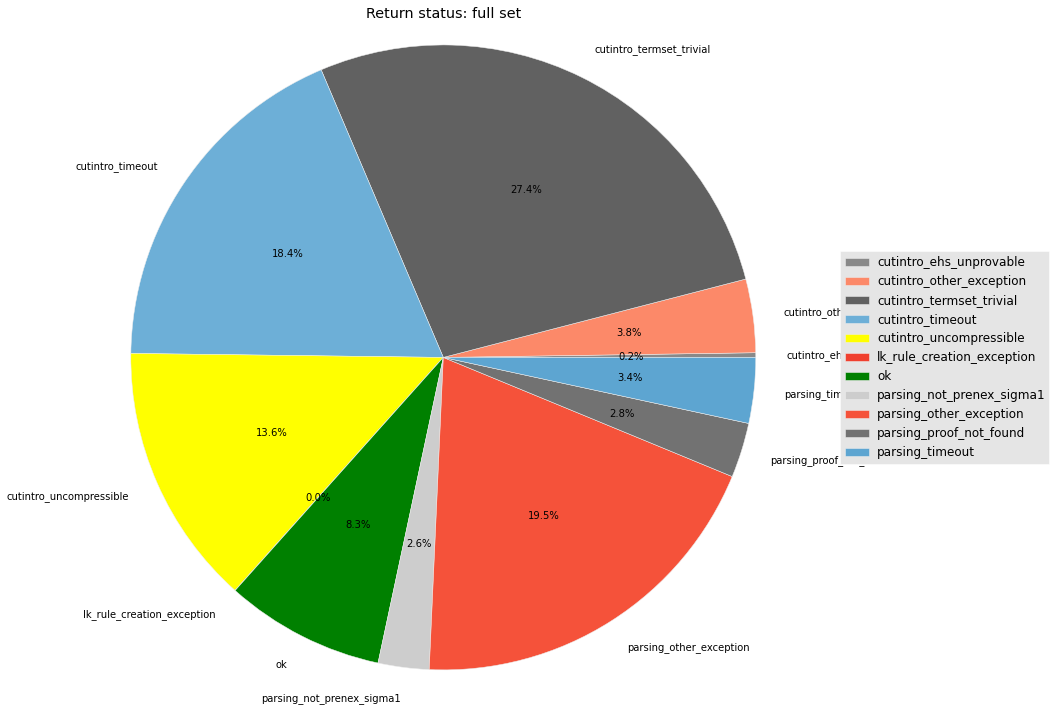

In [11]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

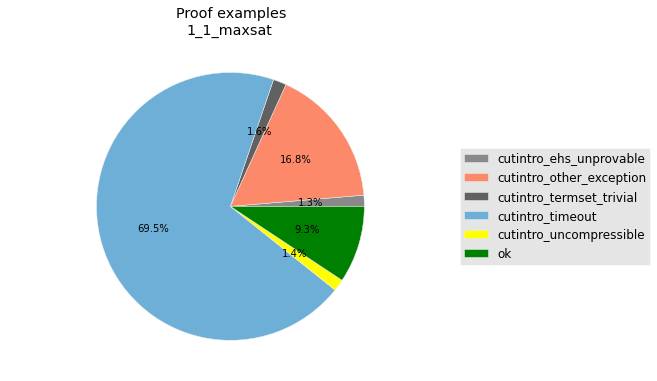

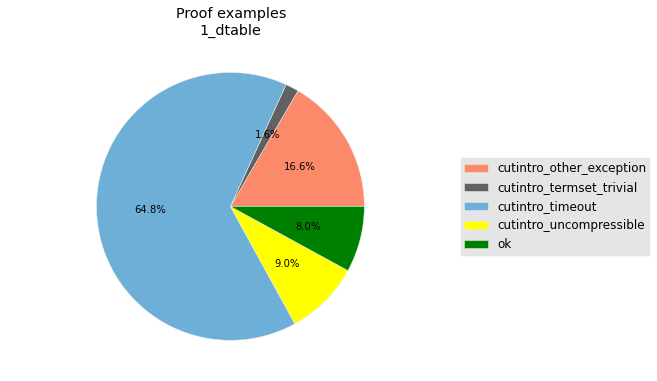

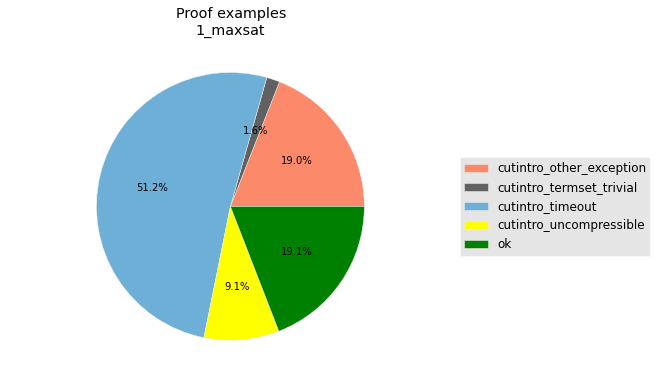

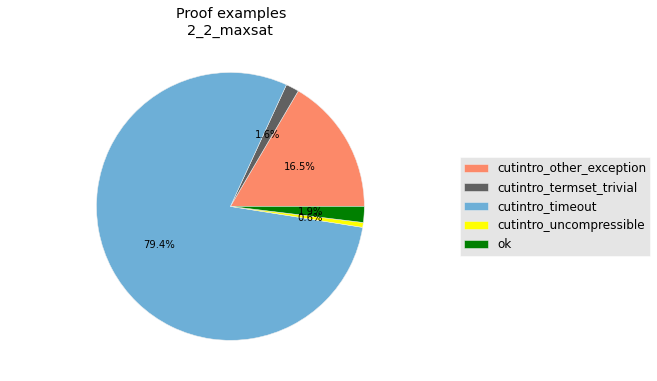

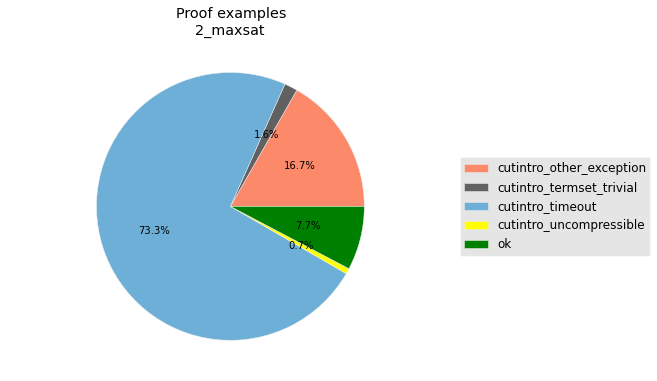

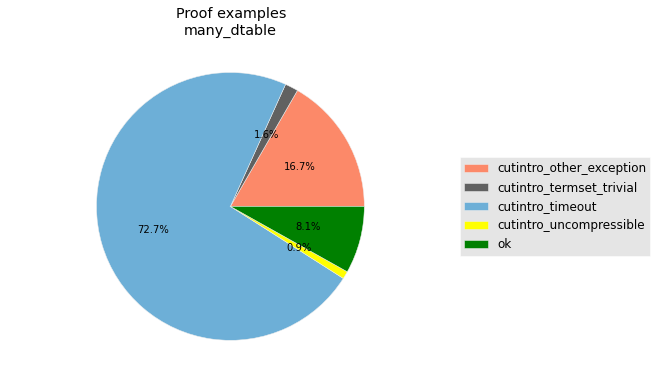

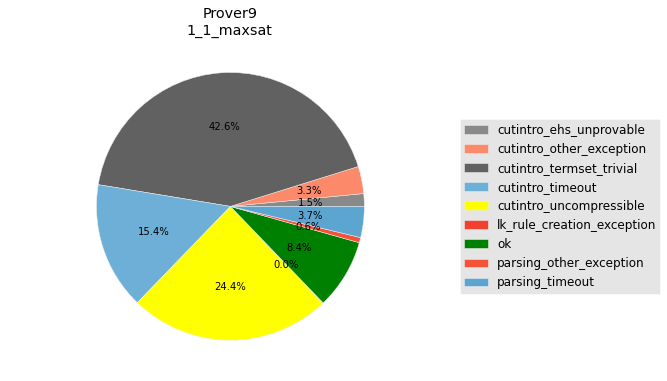

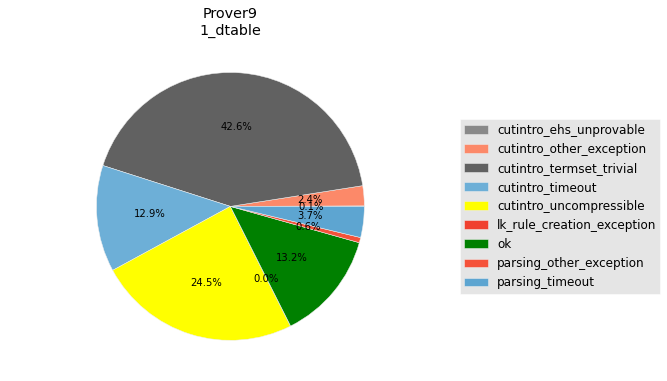

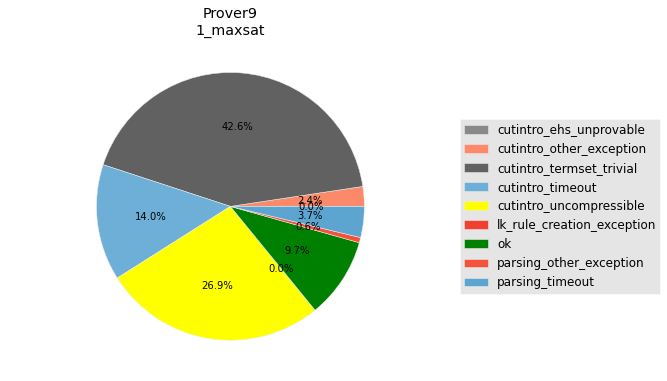

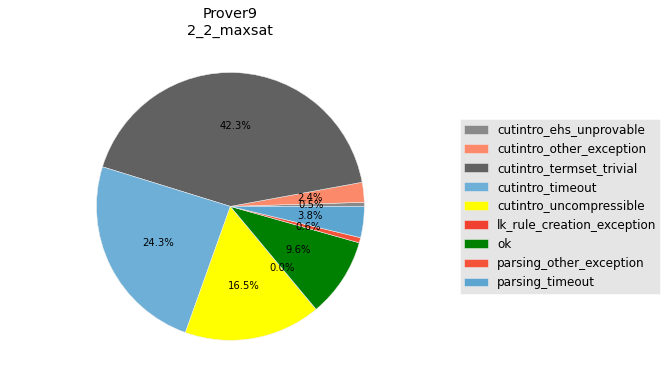

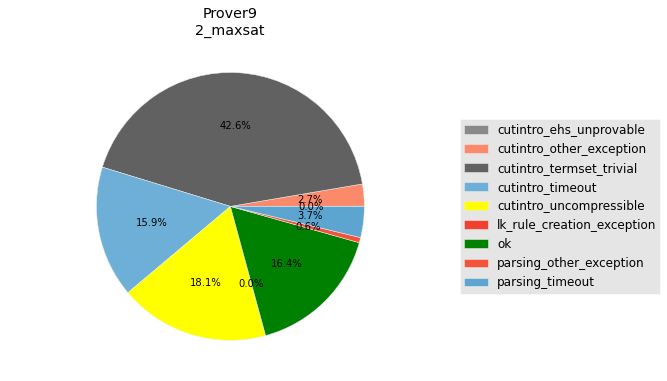

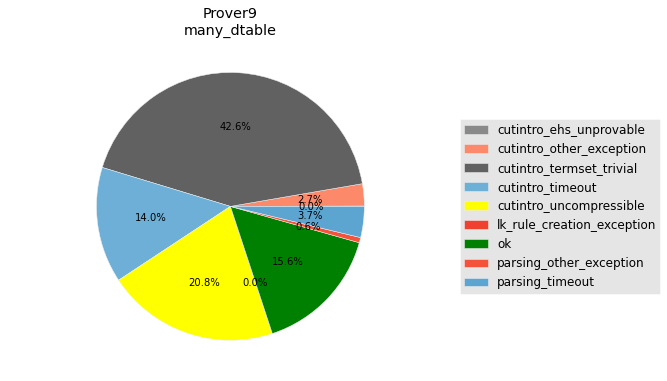

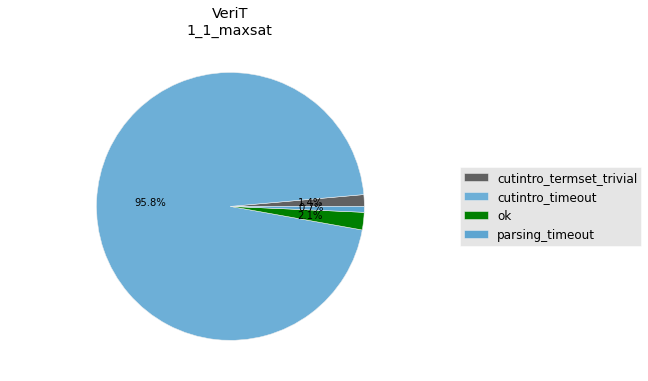

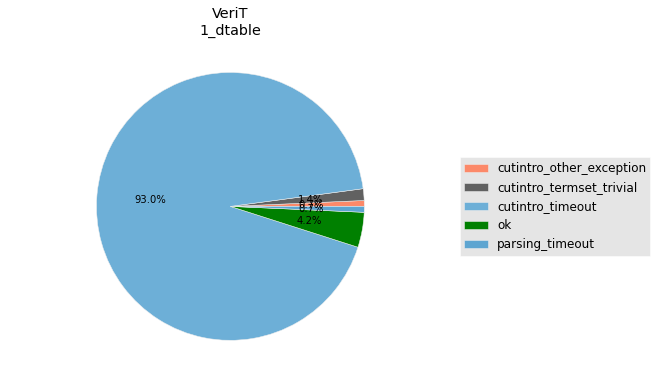

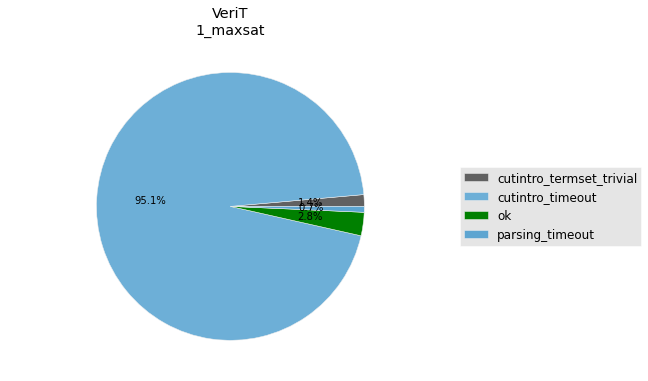

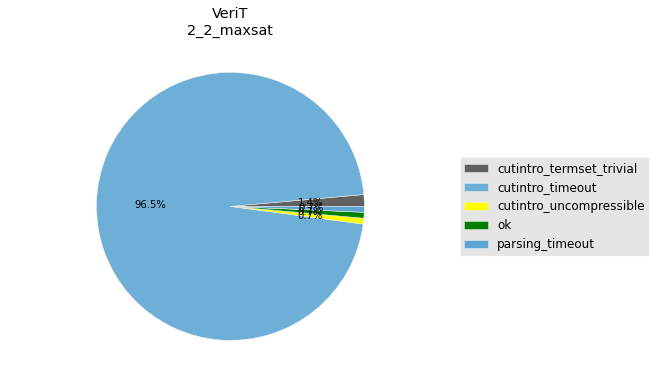

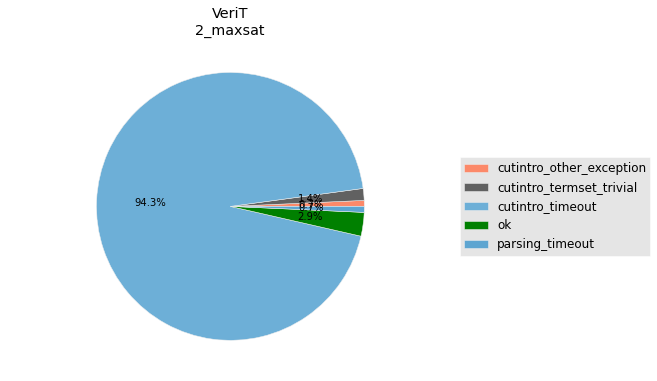

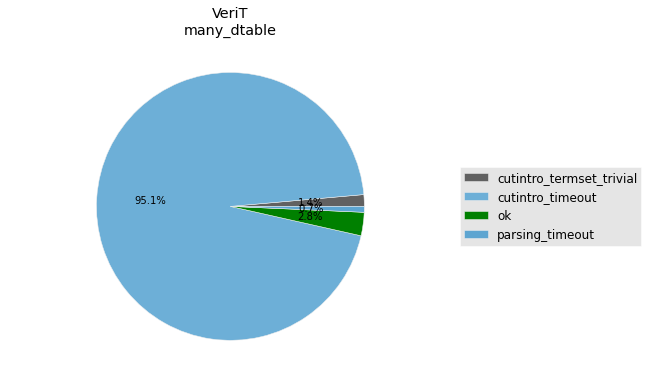

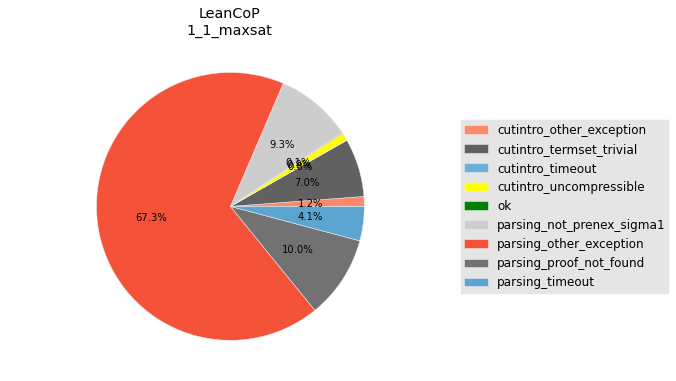

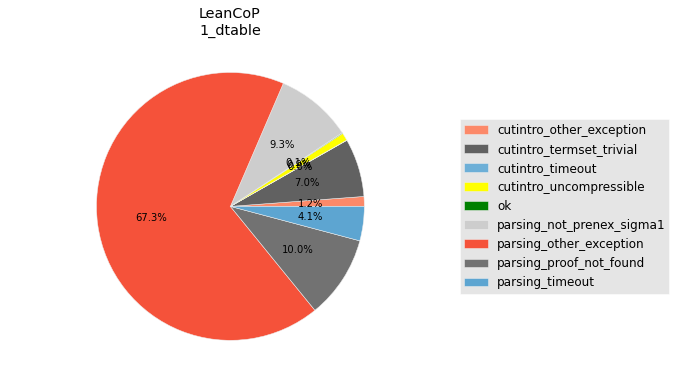

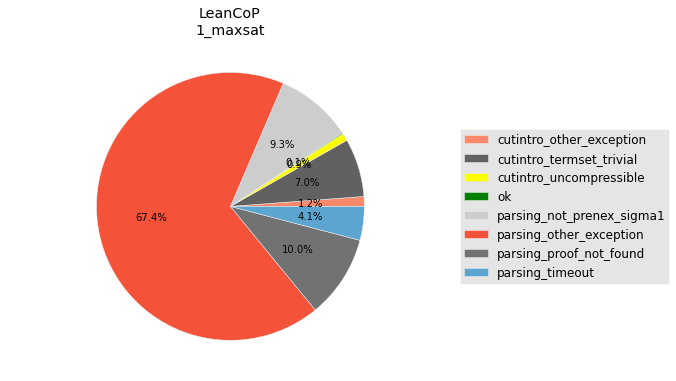

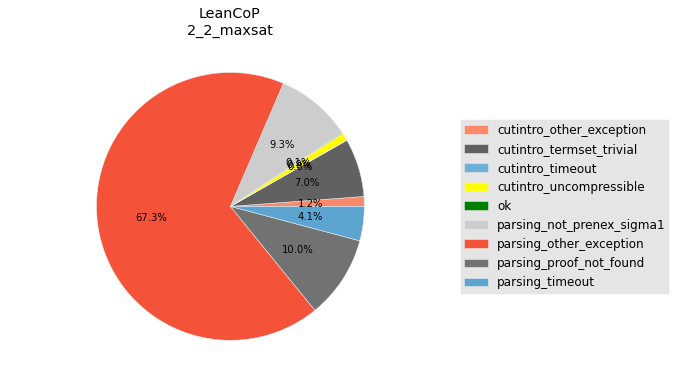

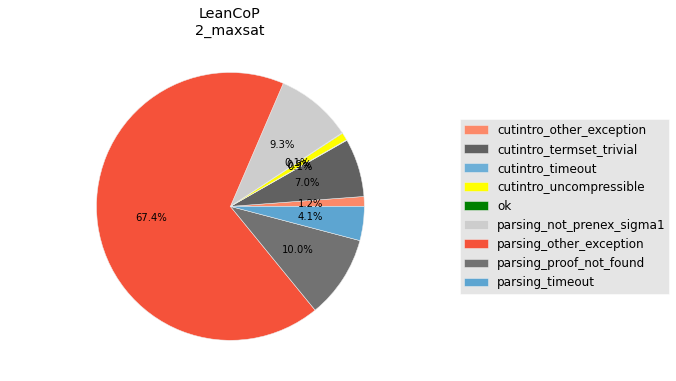

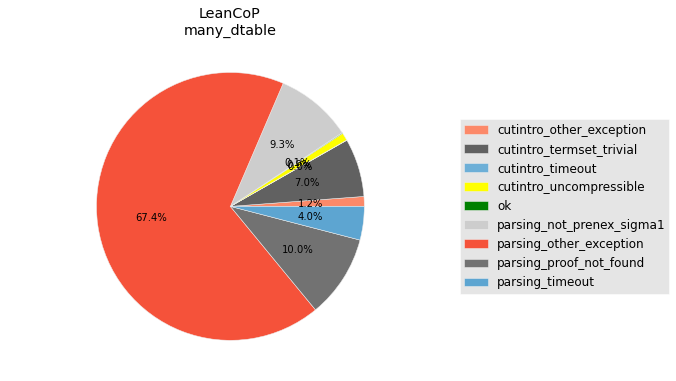

In [12]:
for dbi, db in dbs.items():
    for method in methods:
        subdata = data[(data.db==dbi) & (data.method==method)].groupby('status').size()
        plot_status(subdata, title='{0}\n{1}'.format(db,method), labels=None, figsize=(8,6))
        plt.show()

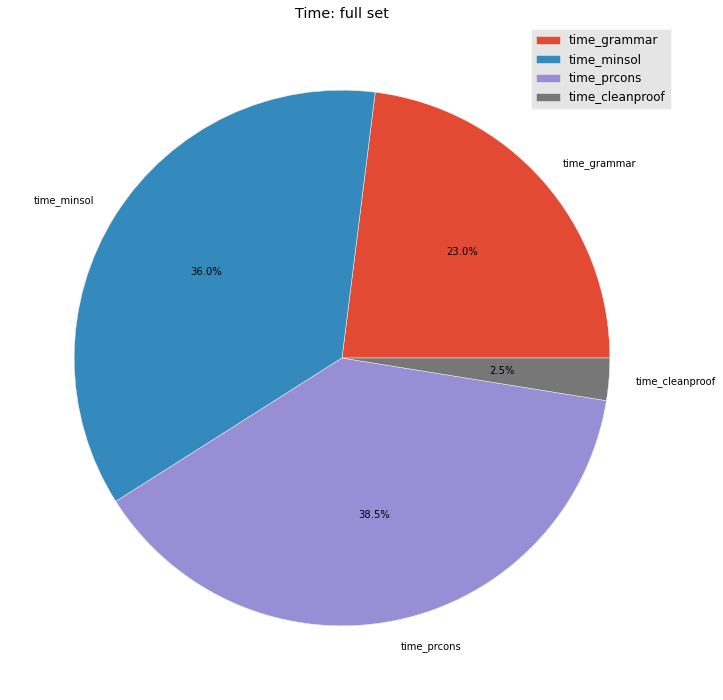

In [13]:
timecols = ['time_grammar', 'time_minsol', 'time_prcons', 'time_cleanproof']
plt.axis('equal')
data[timecols].mean().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%',
                           title='Time: full set', legend=True).set_ylabel('')

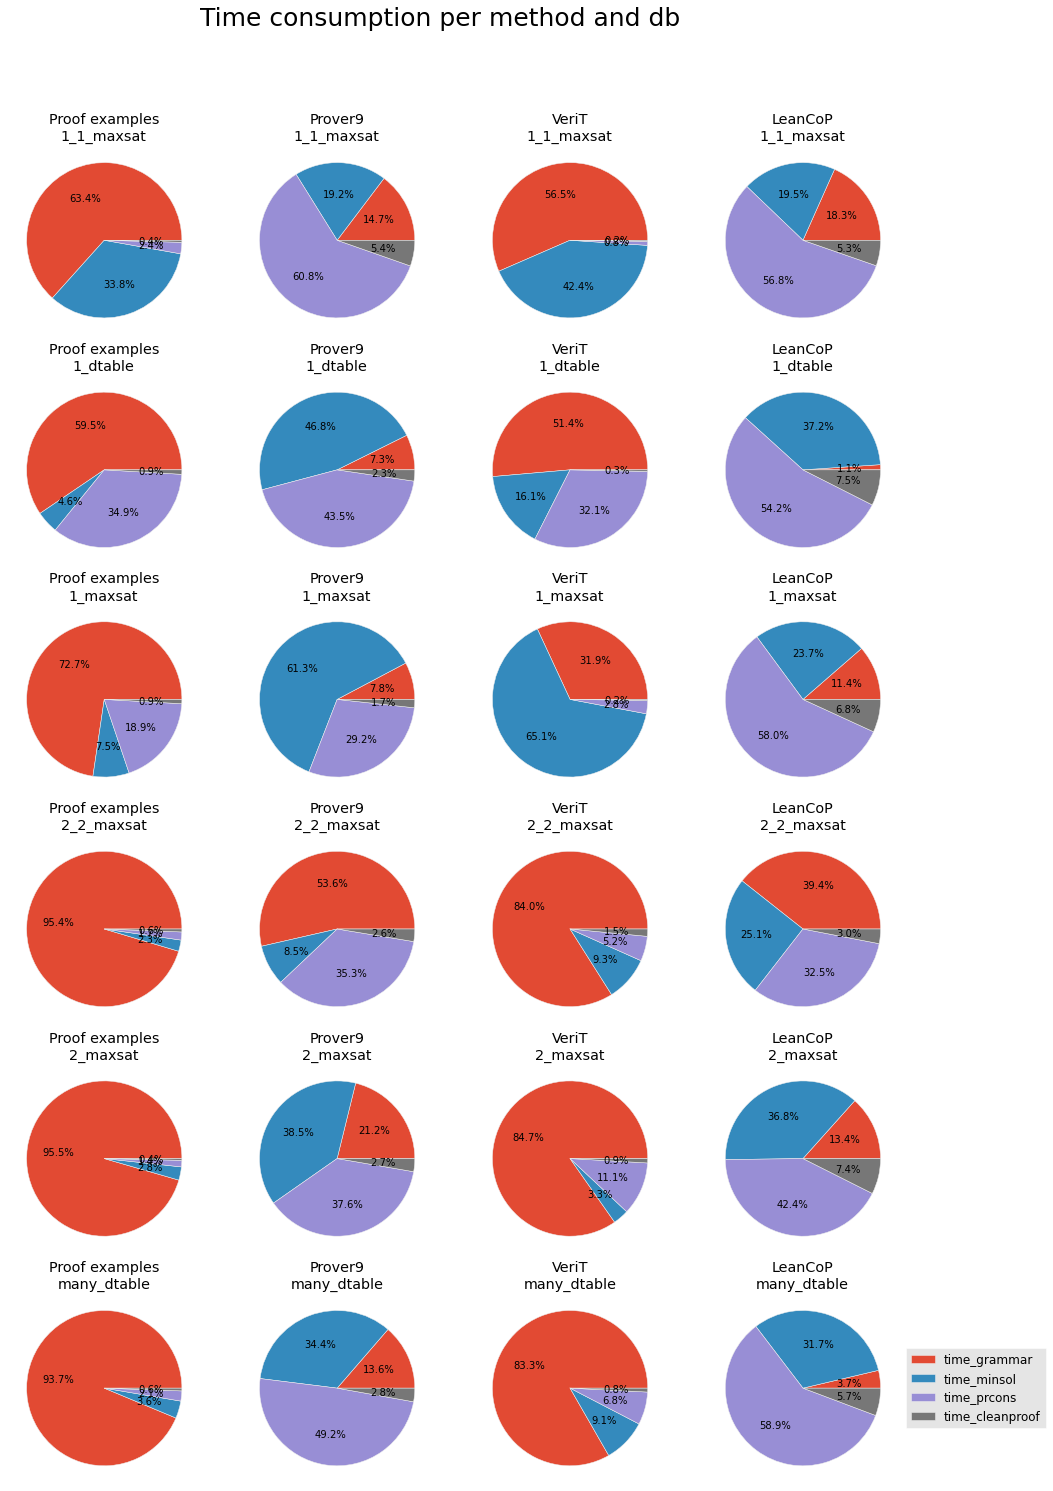

In [14]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        data[(data.db==dbi) & (data.method==method)][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method)).set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

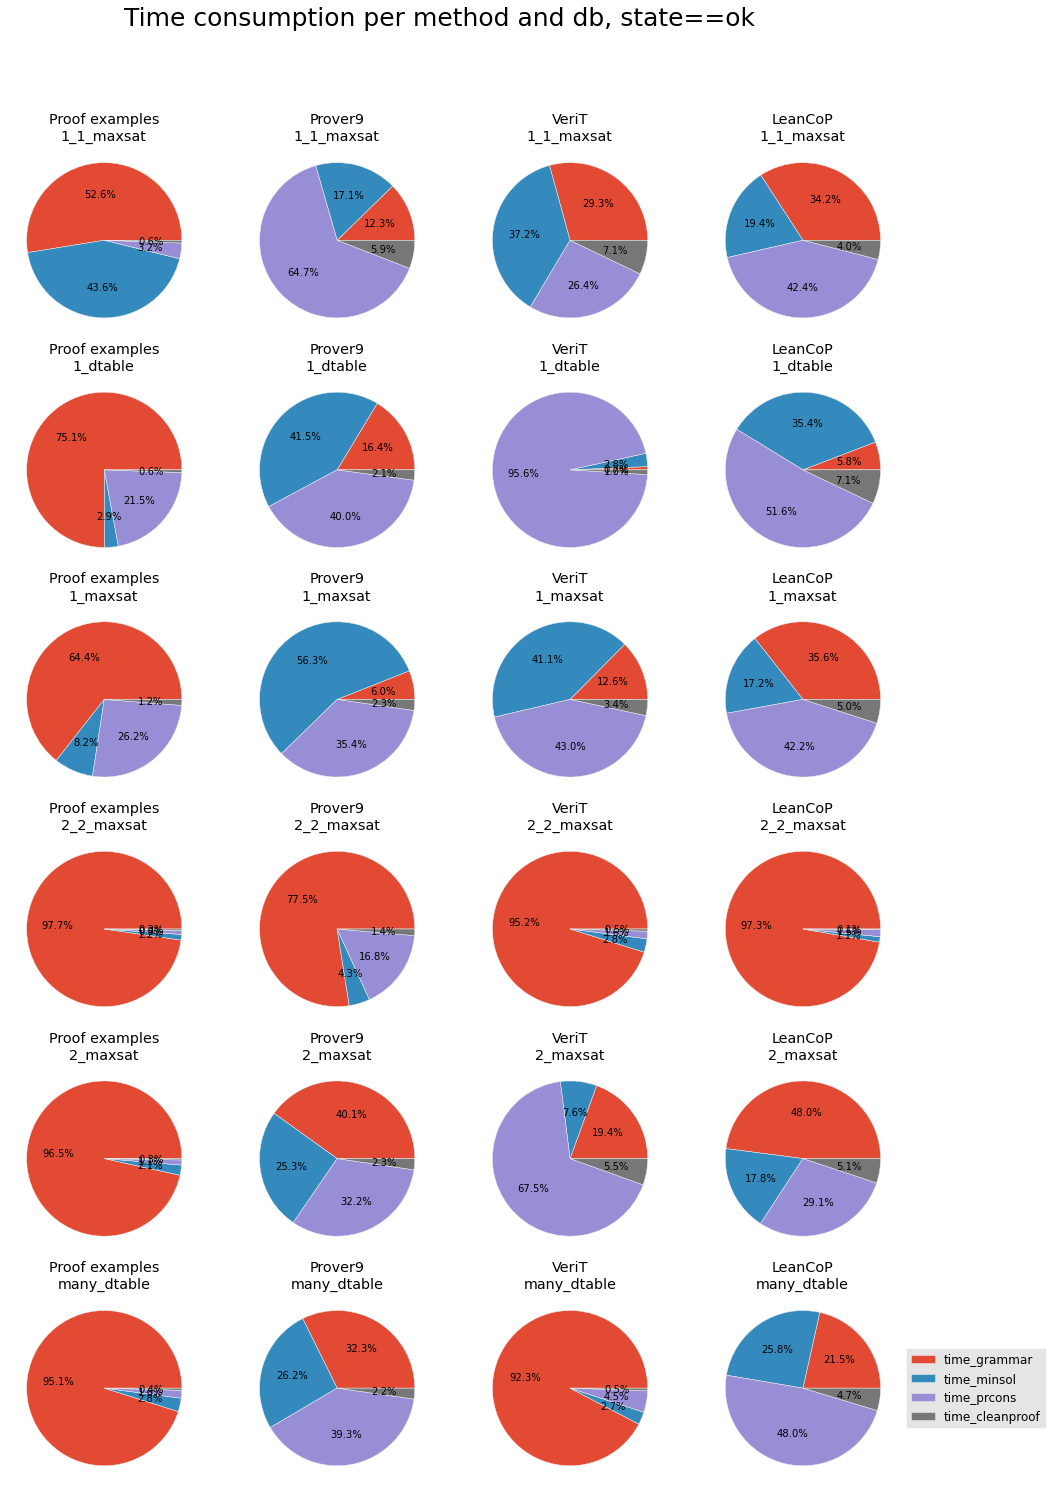

In [15]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db, state==ok', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        ax = data[(data.db==dbi) & (data.method==method) & (data.status=='ok')][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method))
        ax.set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
data['status'].value_counts()

cutintro_termset_trivial      17589
parsing_other_exception       12533
cutintro_timeout              11834
cutintro_uncompressible        8739
ok                             5306
cutintro_other_exception       2441
parsing_timeout                2179
parsing_proof_not_found        1824
parsing_not_prenex_sigma1      1692
cutintro_ehs_unprovable         154
lk_rule_creation_exception        6
dtype: int64

In [17]:
# Different grammar sizes between different methods: one cut with one quantifier
data_dtable = data[(data.method == '1_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '1_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
3,testing/TSTP/prover9/GEO/GEO205+1/Prover9---11...,16,15
4,testing/TSTP/prover9/ALG/ALG437-1/Prover9---11...,36,34
6,testing/TSTP/prover9/SWV/SWV757-1/Prover9---11...,33,31
8,testing/TSTP/prover9/FLD/FLD041-4/Prover9---11...,23,22
13,testing/TSTP/prover9/GRP/GRP700+1/Prover9---11...,19,18
14,testing/TSTP/prover9/RNG/RNG001-2/Prover9---11...,30,29
15,testing/veriT-SMT-LIB/QF_UF/QG-classification/...,147,107
18,testing/TSTP/prover9/PUZ/PUZ021-1/Prover9---11...,18,17
19,testing/TSTP/prover9/MED/MED001+1/Prover9---11...,19,17
21,testing/veriT-SMT-LIB/QF_UF/QG-classification/...,176,129


In [18]:
# Different grammar sizes between different methods: one cut with multiple quantifiers
data_dtable = data[(data.method == 'many_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '2_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
0,testing/TSTP/prover9/GRP/GRP171-2/Prover9---11...,27,20
2,testing/TSTP/prover9/MGT/MGT062-1/Prover9---11...,28,27
6,testing/TSTP/prover9/CAT/CAT004-2/Prover9---11...,21,19
7,testing/TSTP/prover9/LCL/LCL362-1/Prover9---11...,25,26
8,testing/TSTP/prover9/PRO/PRO002+2/Prover9---11...,51,49
9,testing/TSTP/prover9/SEU/SEU241+1/Prover9---11...,21,20
10,testing/TSTP/prover9/SYN/SYN171-1/Prover9---11...,25,24
12,testing/TSTP/prover9/BOO/BOO003-2/Prover9---11...,24,18
14,testing/TSTP/prover9/MGT/MGT054-1/Prover9---11...,21,20
15,testing/TSTP/prover9/KLE/KLE027+4/Prover9---11...,45,36


In [19]:
# Better compression with 2x2 quantifiers than 1x2 quantifiers or 2x1 quantifiers
data_1x2 = data[(data.method == '2_maxsat') & data.grammar_size]
data_2x1 = data[(data.method == '1_1_maxsat') & data.grammar_size]
data_2x2 = data[(data.method == '2_2_maxsat') & data.grammar_size]

merged = data_1x2.merge(data_2x1, on='file', suffixes=('_1x2', '_2x1')) \
    .merge(data_2x2, on='file')
merged[(merged.grammar_size < merged.grammar_size_1x2) & (merged.grammar_size < merged.grammar_size_2x1)] \
    [['file', 'grammar_size', 'grammar_size_2x1', 'grammar_size_1x2']]

,file,grammar_size,grammar_size_2x1,grammar_size_1x2
19,testing/TSTP/prover9/SWV/SWV798-1/Prover9---11...,15,17,16
41,testing/TSTP/prover9/GEO/GEO198+1/Prover9---11...,15,19,17
44,testing/TSTP/prover9/RNG/RNG001-4/Prover9---11...,16,18,17
45,testing/TSTP/prover9/SWV/SWV795-1/Prover9---11...,15,17,16
62,testing/TSTP/prover9/PRO/PRO003+2/Prover9---11...,32,35,33
90,testing/TSTP/prover9/FLD/FLD057-3/Prover9---11...,27,31,29
96,testing/TSTP/prover9/GEO/GEO181+2/Prover9---11...,14,18,16
114,testing/TSTP/prover9/GEO/GEO181+1/Prover9---11...,14,16,15
115,testing/TSTP/prover9/GRP/GRP128-4.003/Prover9-...,18,20,20
118,testing/TSTP/prover9/GRP/GRP134-2.003/Prover9-...,18,20,21


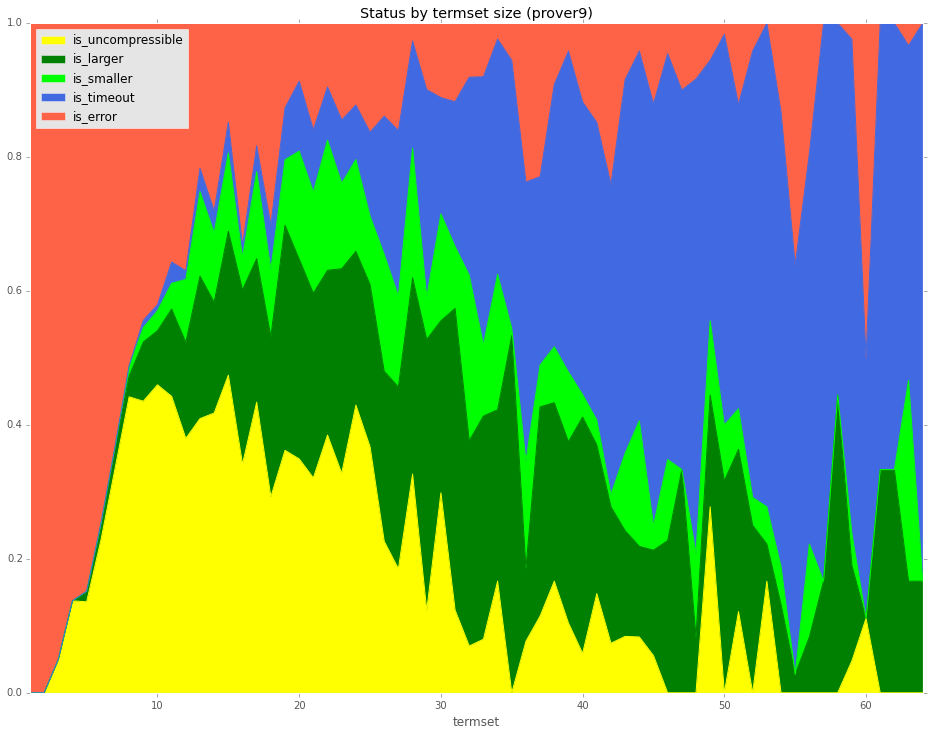

In [20]:
data['is_smaller'] = (data.status=='ok') & (data.ehs_resinf < data.resinf_input)
data['is_larger'] = (data.status=='ok') & (data.ehs_resinf >= data.resinf_input)
data['is_uncompressible'] = data.status.str.endswith('uncompressible')
data['is_timeout'] = data.status.str.endswith('timeout')
data['is_error'] = ~data.is_smaller & ~data.is_larger & ~data.is_uncompressible & ~data.is_timeout

data[(data.termset<65)&(data.db==1)].groupby('termset').mean() \
    [['is_uncompressible', 'is_larger', 'is_smaller', 'is_timeout', 'is_error']] \
    .plot(kind='area', figsize=(16,12), ylim=(0,1), title='Status by termset size (prover9)',
          color=['yellow', 'green', 'lime', 'royalblue', 'tomato'])

In [21]:
# Proofs with good compression of EHS/HS
data[data.ehs_resinf/data.hs_resinf < 0.1] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
5743,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,1_maxsat,11,149,10
6691,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,2_maxsat,11,149,10
33652,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,1_1_maxsat,11,149,10
34745,testing/TSTP/prover9/GRP/GRP449-1/Prover9---11...,1_1_maxsat,32,531,20
39868,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,many_dtable,11,149,10
47383,testing/TSTP/prover9/GRP/GRP532-1/Prover9---11...,1_1_maxsat,59,1562,25
51405,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,1_dtable,11,149,10
55512,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,2_2_maxsat,11,149,10
57445,testing/TSTP/prover9/GRP/GRP482-1/Prover9---11...,1_1_maxsat,14,245,31
57737,testing/TSTP/prover9/GRP/GRP446-1/Prover9---11...,1_1_maxsat,28,357,20


In [22]:
# Proofs with good compression of EHS/input
data[data.ehs_resinf/data.resinf_input < 0.2] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
3112,testing/TSTP/prover9/NUM/NUM477+2/Prover9---11...,many_dtable,11,12,59
9805,testing/TSTP/prover9/SEU/SEU154+1/Prover9---11...,1_dtable,12,12,61
17552,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,many_dtable,14,14,76
48213,testing/TSTP/prover9/BOO/BOO011-4/Prover9---11...,many_dtable,4,5,40
53460,testing/TSTP/prover9/SEU/SEU154+1/Prover9---11...,many_dtable,12,12,61
56345,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,1_dtable,14,14,76
59052,testing/TSTP/prover9/BOO/BOO018-4/Prover9---11...,1_1_maxsat,3,8,41
59567,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,1_maxsat,14,14,76


In [23]:
# Proofs with blowup
data[data.ehs_resinf > 5*data.hs_resinf] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
148,FactorialFunctionEqualityExampleProof2(9),1_1_maxsat,976,81,NaN
10523,UniformAssociativity3ExampleProof(1),2_maxsat,46,5,NaN
10730,FactorialFunctionEqualityExampleProof2(4),1_1_maxsat,191,30,NaN
11039,SumOfOnesExampleProof(22),1_maxsat,663,66,NaN
11790,testing/TSTP/prover9/SWV/SWV558-1.007/Prover9-...,2_maxsat,1276,164,151
23776,testing/TSTP/prover9/GRP/GRP267-1/Prover9---11...,1_1_maxsat,950,152,58
27494,testing/TSTP/prover9/GRP/GRP544-1/Prover9---11...,2_2_maxsat,75,14,13
30378,FactorialFunctionEqualityExampleProof(7),2_maxsat,299,58,NaN
30499,testing/TSTP/prover9/BOO/BOO011-4/Prover9---11...,1_1_maxsat,34,5,40
32100,testing/TSTP/prover9/SWV/SWV236+1/Prover9---11...,1_1_maxsat,258,44,21


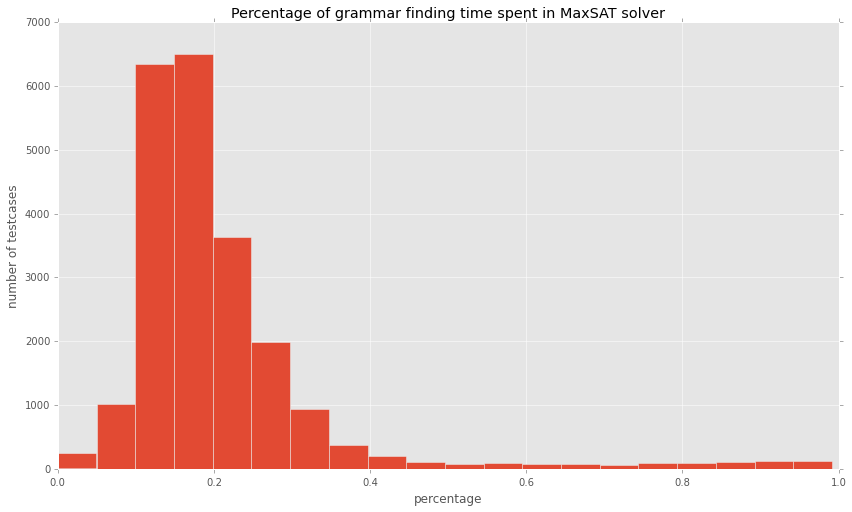

In [24]:
ax = (data.time_maxsat/data.time_grammar).dropna().plot(kind='hist', figsize=(14,8),
    title='Percentage of grammar finding time spent in MaxSAT solver', bins=20)
ax.set_xlabel('percentage')
ax.set_ylabel('number of testcases')